# Pre-Comparison

In [ ]:
# Libraries (Venn Diagram)
library(tidyverse)
library(VennDiagram)

# Libraries (NMDS)
library(ROBITools)
library(reshape2)
library(vegan)
library(ggalt)
library(ggpubr)
library(ggrepel)

# Heatmap
library(RColorBrewer)
library(compositions)
library(ComplexHeatmap)

**QBit**

In [5]:
newnames <- c('EN0.2A','EN0.2B','EN0.2C','OP0.2A','OP0.2B','OP0.2C','OP1.2A','OP1.2B','OP1.2C','OP5.0A','OP5.0B','OP5.0C','OP8.0A','OP8.0B','OP8.0C')
values <- c(15.6, 14.6, 20.8, 11.7, 9.48, 7.72, 3.74, 5.16, 7.44, 1.22, 2.44, 2.64, 1.27, 2.16, 1.71)
pore <- c('EN0.2','EN0.2','EN0.2','OP0.2','OP0.2','OP0.2','OP1.2','OP1.2','OP1.2','OP5.0','OP5.0','OP5.0','OP8.0','OP8.0','OP8.0')
df <- data.frame(sample = newnames, values, pore)

In [20]:
p <- df %>% ggplot() + geom_boxplot(aes(x=pore,y=values,fill=pore)) +
scale_fill_manual(values = c("#F8766D", "#B79F00", "#00BF7D", "#00B0F6", "#E76BF3")) +
labs(x = "Sample", y="Qbit Conc. (ng/µL)", fill="Filter type") +
theme_classic() %+replace% theme(axis.text.x = element_text(angle = 90, size=18),
                                 axis.text.y = element_text(size=18),
                                 axis.title = element_text(size=20),
                                 strip.text.x = element_text(size = 16, face="bold"),
                                 strip.background = element_blank(),
                                 legend.title = element_text(size=18, face="bold"),
                                 legend.text = element_text(size=16))

png(file="GenomeDK_LCA//07-Plots/Qbit.concentration.png", width=2300, height=2000, res=300)
p
dev.off()

png 
  2

### Metabarcoding

In [2]:
# Data
metabar_taxa  <- read.delim("GenomeDK_Metabar/classified.txt")
metabar_count <- read.delim("GenomeDK_Metabar/DADA2_nochim.table")

In [3]:
# Select controls
m_cne <- grepl("CNE", names(metabar_count))
m_cne[1] <- TRUE
m_ntc <- grepl("NTC", names(metabar_count))
m_ntc[1] <- TRUE

cne <- metabar_count[,m_cne]
ntc <- metabar_count[,m_ntc]

# Find contaminants
cne_cont <- cne %>% mutate(total = rowSums(cne[,-1])) %>% filter(total > 0)
ntc_cont <- ntc %>% mutate(total = rowSums(ntc[,-1])) %>% filter(total > 0)

In [4]:
# Save contaminants
cont <- unique(c(cne_cont$id, ntc_cont$id))
cont_table <- metabar_taxa %>% filter(qseqid %in% cont) %>% select(qseqid, kingdom, phylum, class, order, family, genus, species)
write.table(cont_table, "GenomeDK_Metabar/metabar.contaminants.tsv", quote=T, sep="\t", row.names = F)

In [5]:
# Select contaminant sequences
cont <- unique(c(cne_cont$id, ntc_cont$id))

# Remove contaminants and filter
metabarcoding <- metabar_taxa %>% filter(!qseqid %in% cont) %>% filter(pident.max.best > 90)

# Select contaminants
contaminants <- metabar_taxa %>% filter(qseqid %in% cont)

# Metabarcoding diversity
tx <- metabarcoding[,c(8:14)]
dk <- length(unique(tx$kingdom[!is.na(tx$kingdom)]))
dp <- length(unique(tx$phylum[!is.na(tx$phylum)]))
dc <- length(unique(tx$class[!is.na(tx$class)]))
do <- length(unique(tx$order[!is.na(tx$order)]))
df <- length(unique(tx$family[!is.na(tx$family)]))
dg <- length(unique(tx$genus[!is.na(tx$genus)]))
ds <- length(unique(tx$species[!is.na(tx$species)]))

message(paste("Metabarcoding diversity: kingdom: ", dk, ", phylum: ", dp,
              ", class: ", dc, ", order: ", do, ", family: ", df, ", genus: ", dg, " and species: ", ds, sep=""))

Metabarcoding diversity: kingdom: 3, phylum: 46, class: 155, order: 432, family: 808, genus: 1292 and species: 2058



In [8]:
# Remove contaminant from counts
metabar_count_clean <- metabar_count %>% filter(!id %in% cont)
metabar_count_clean <- metabar_count_clean[,!grepl("NTC", names(metabar_count_clean))]
metabar_count_clean <- metabar_count_clean[,!grepl("CNE", names(metabar_count_clean))]

In [9]:
# Save taxonomy metabarcoding
taxa_metabar <- metabarcoding %>% select(kingdom, phylum, class, order, family, genus, species) %>% unique() %>% arrange(kingdom)
write.table(taxa_metabar, "GenomeDK_Metabar/metabar.taxonomy.tsv", quote=T, sep="\t", row.names = F)

In [10]:
# Rename columns
cols <- colnames(metabar_count_clean)

clean_cols <- str_replace(str_replace(cols[-1], "sample.", ""),"u","")
clean_cols <- str_replace(clean_cols, "GP1", "EN0.2A")
clean_cols <- str_replace(clean_cols, "GP2", "EN0.2B")
clean_cols <- str_replace(clean_cols, "GP3", "EN0.2C")
clean_cols <- str_replace(clean_cols, "1_0.2", "OP0.2A")
clean_cols <- str_replace(clean_cols, "2_0.2", "OP0.2B")
clean_cols <- str_replace(clean_cols, "3_0.2", "OP0.2C")
clean_cols <- str_replace(clean_cols, "1_1.2", "OP1.2A")
clean_cols <- str_replace(clean_cols, "2_1.2", "OP1.2B")
clean_cols <- str_replace(clean_cols, "3_1.2", "OP1.2C")
clean_cols <- str_replace(clean_cols, "1_5.0", "OP5.0A")
clean_cols <- str_replace(clean_cols, "2_5.0", "OP5.0B")
clean_cols <- str_replace(clean_cols, "3_5.0", "OP5.0C")
clean_cols <- str_replace(clean_cols, "1_8.0", "OP8.0A")
clean_cols <- str_replace(clean_cols, "2_8.0", "OP8.0B")
clean_cols <- str_replace(clean_cols, "3_8.0", "OP8.0C")

colnames(metabar_count_clean)[-1] <-  clean_cols
cols <- colnames(metabar_count_clean)

**Rarefaction**

In [11]:
# Save dataset for ROBITools
cs2mr <- metabar_count_clean
colnames(cs2mr)[-1] <- paste("sample:", colnames(cs2mr)[-1], sep="")
f = 'GenomeDK_Metabar/temporal/all_for_rep_rarefy.txt'
#write.table(cs2mr, file=f, quote=FALSE, sep='\t', col.names = NA, row.names=TRUE)

In [12]:
# Load dataset into ROBITools
dfimp <- import.metabarcoding.data(f)
df_mod <- dfimp$samples %>% mutate(replicate =  dfimp$samples$sample) %>% mutate(sample = gsub("_[0-9]", "", dfimp$samples$sample))
dfimp@samples = df_mod

In [13]:
# Rarefy metabarcoding
median = median(rowSums(dfimp$reads[dfimp$samples$replicate,]))
raw.rarefy = ROBITools::rarefy(dfimp, n=median, MARGIN='sample')
tmp = ROBITools:::aggregate.metabarcoding.data(raw.rarefy, by=list(sample=raw.rarefy$samples$sample), FUN=sum)
minimum = min(rowSums(tmp$reads[tmp$samples$sample,]))
final.rarefy = ROBITools::rarefy(tmp, n=minimum, MARGIN = 'sample')

### Shotgun

In [14]:
# Datasets
shotgun_taxa_count <- read.delim("GenomeDK_LCA/counts.lca.rarefy.tsv")

# Correct taxa (class-order inversion)
temp <- shotgun_taxa_count$order
shotgun_taxa_count$order <- shotgun_taxa_count$class
shotgun_taxa_count$class <- temp

# Select Eukaryotes
shotgun_eu <- shotgun_taxa_count %>% filter(superkingdom == "Eukaryota")

In [15]:
# Save shotgun taxonomy
taxa_shotgun <- shotgun_taxa_count %>% select(superkingdom, kingdom, phylum, class, order, family, genus, species) %>% unique()
write.table(taxa_shotgun, "GenomeDK_LCA/shotgun.taxonomy.tsv", quote=T, sep="\t", row.names = F)

In [25]:
# Identify contaminant families that are only present as contaminants

a <- unique(shotgun_taxa_count$family)
a <- a[!is.na(a)]

b <- unique(cont_table$family)
b <- b[!is.na(b)]

c <- unique(taxa_metabar$family)
c <- c[!is.na(c)]

d <- b[!b %in% c]

table(a %in% d)

a[a %in% d]


FALSE  TRUE 
 1080     3 

[1] "Mycosphaerellaceae" "Brachionidae"       "Cymbellaceae"

In [32]:
# Identify contaminant genus that are only present as contaminants

a <- unique(shotgun_taxa_count$genus)
a <- a[!is.na(a)]

b <- unique(cont_table$genus)
b <- b[!is.na(b)]

c <- unique(taxa_metabar$genus)
c <- c[!is.na(c)]

d <- b[!b %in% c]

table(a %in% d)

a[a %in% d]


FALSE  TRUE 
 2283    11 

[1] "Ramularia"    "Verticillium" "Trichoderma"  "Zea"          "Capsicum"    
 [6] "Encyonema"    "Gomphonema"   "Diatoma"      "Ulnaria"      "Vermamoeba"  
[11] "Capsaspora"

In [44]:
# Identify contaminant species that are only present as contaminants

a <- unique(shotgun_taxa_count$species)
a <- a[!is.na(a)]

b <- unique(cont_table$species)
b <- b[!is.na(b)]

c <- unique(taxa_metabar$species)
c <- c[!is.na(c)]

d <- b[!b %in% c]

table(a %in% d)

a[a %in% d]


FALSE  TRUE 
 6100    12 

[1] "Verticillium dahliae"   "Zea mays"               "Capsicum frutescens"   
 [4] "Solanum lycopersicum"   "Diatoma tenuis"         "Ulnaria ulna"          
 [7] "Loxophyllum shini"      "Vermamoeba vermiformis" "Cryptomonas curvata"   
[10] "Pythium hydnosporum"    "Pythium insidiosum"     "Capsaspora owczarzaki"

# Comparison

In [50]:
# Function
display_venn <- function(x, ...){
  grid.newpage()
  venn_object <- venn.diagram(x, filename = NULL, ...)
  grid.draw(venn_object)
}

In [51]:
# Clean rarefied metabarcoding
remove <- colnames(final.rarefy@reads)[colSums(final.rarefy@reads) == 0]
metbar <- metabarcoding[!metabarcoding$qseqid %in% remove,]

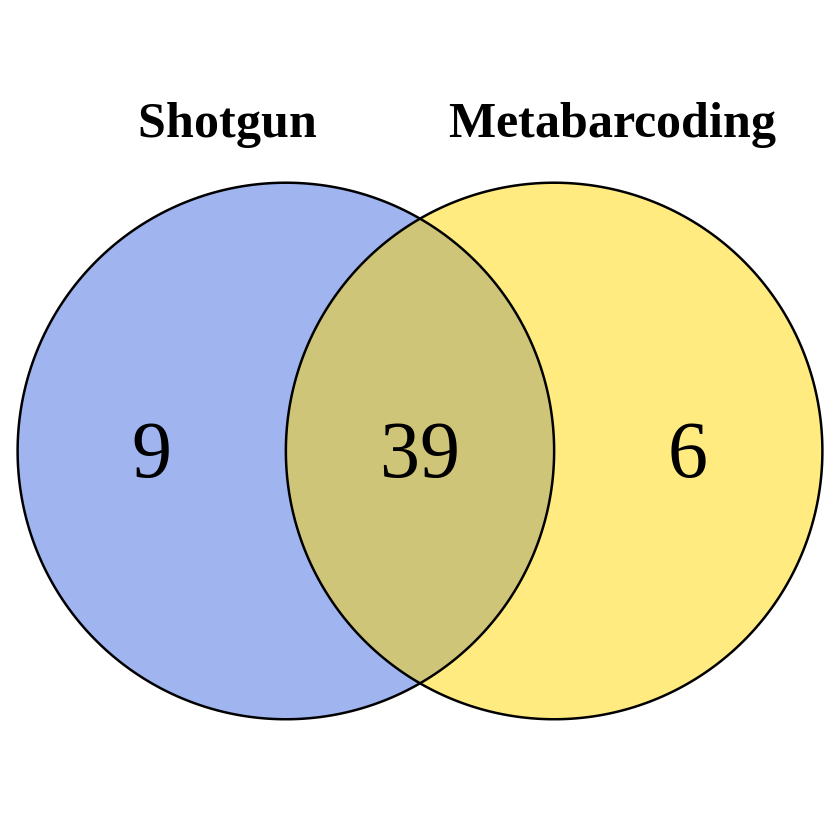

In [99]:
# Phylum
phyl_metabar <- unique(metbar$phylum[!is.na(metbar$phylum)])
phyl_shotgun <- unique(shotgun_eu$phylum[!is.na(shotgun_eu$phylum)])
taxa <- list(metabarcoding = phyl_metabar, shotgun_eu = phyl_shotgun)

# Venn Diagram (Saved manually)
display_venn(taxa,
             category.names = c("Metabarcoding", "Shotgun"),
             fill = c("gold", "royalblue"),
             cex = 4,
             cat.cex = 2.5, cat.fontface = "bold", 
             cat.pos = c(10,-10),
             cat.dist = c(0.05, 0.05),
             scaled = F)

In [18]:
table(taxa$metabarcoding %in% taxa$shotgun_eu)
table(taxa$shotgun_eu %in% taxa$metabarcoding)


FALSE  TRUE 
    7    39 


FALSE  TRUE 
    9    39 

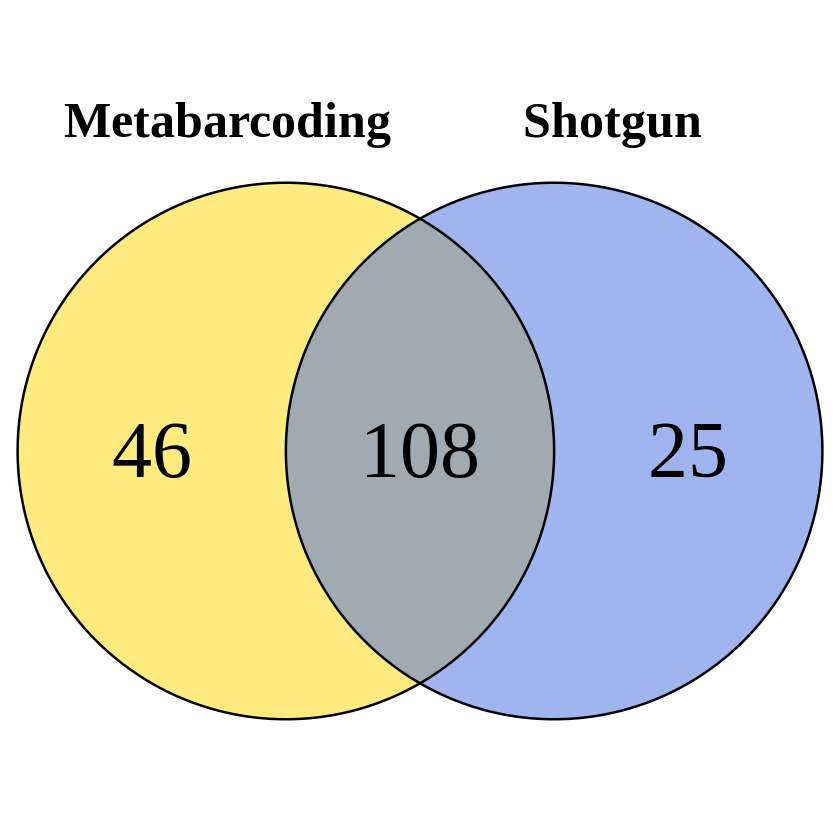

In [100]:
# Class
cla_metabar <- unique(metbar$class[!is.na(metbar$class)])
cla_shotgun <- unique(shotgun_eu$class[!is.na(shotgun_eu$class)])
taxa <- list(metabarcoding = cla_metabar, shotgun_eu = cla_shotgun)

# Venn Diagram (Saved manually)
display_venn(taxa,
             category.names = c("Metabarcoding", "Shotgun"),
             fill = c("gold", "royalblue"),
             cex = 4,
             cat.cex = 2.5, cat.fontface = "bold",
             cat.pos = c(-10,10),
             cat.dist = c(0.05, 0.05),
             scaled = F)

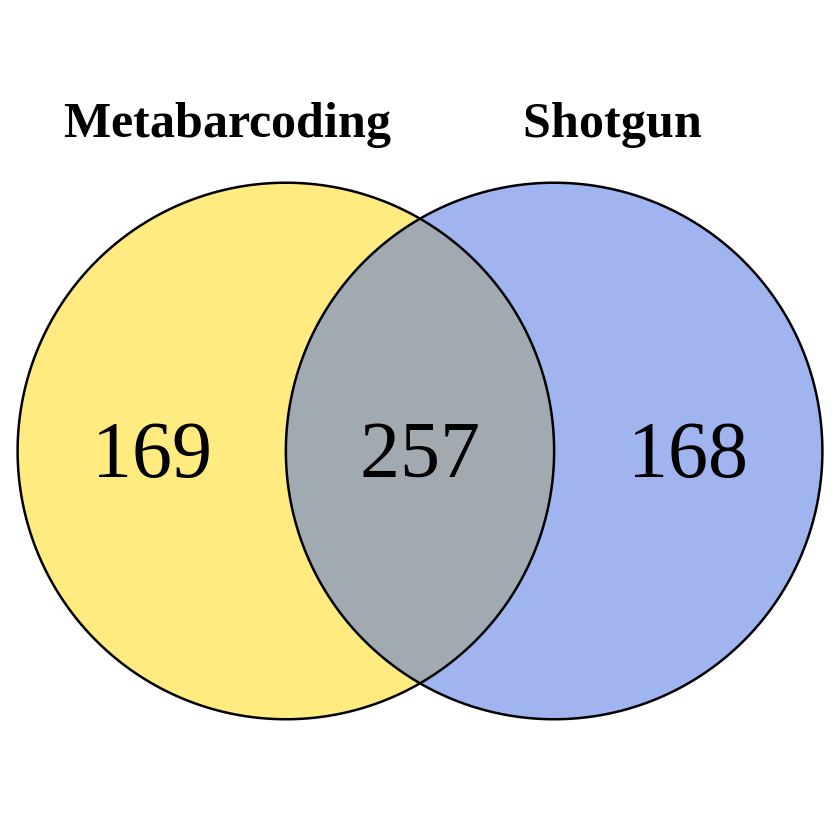

In [101]:
# Order
ord_metabar <- unique(metbar$order[!is.na(metbar$order)])
ord_shotgun <- unique(shotgun_eu$order[!is.na(shotgun_eu$order)])
taxa <- list(metabarcoding = ord_metabar, shotgun_eu = ord_shotgun)

# Venn Diagram (Saved manually)
display_venn(taxa,
             category.names = c("Metabarcoding", "Shotgun"),
             fill = c("gold", "royalblue"),
             cex = 4,
             cat.cex = 2.5, cat.fontface = "bold",
             cat.pos = c(-10,10),
             cat.dist = c(0.05, 0.05),
             scaled = F)

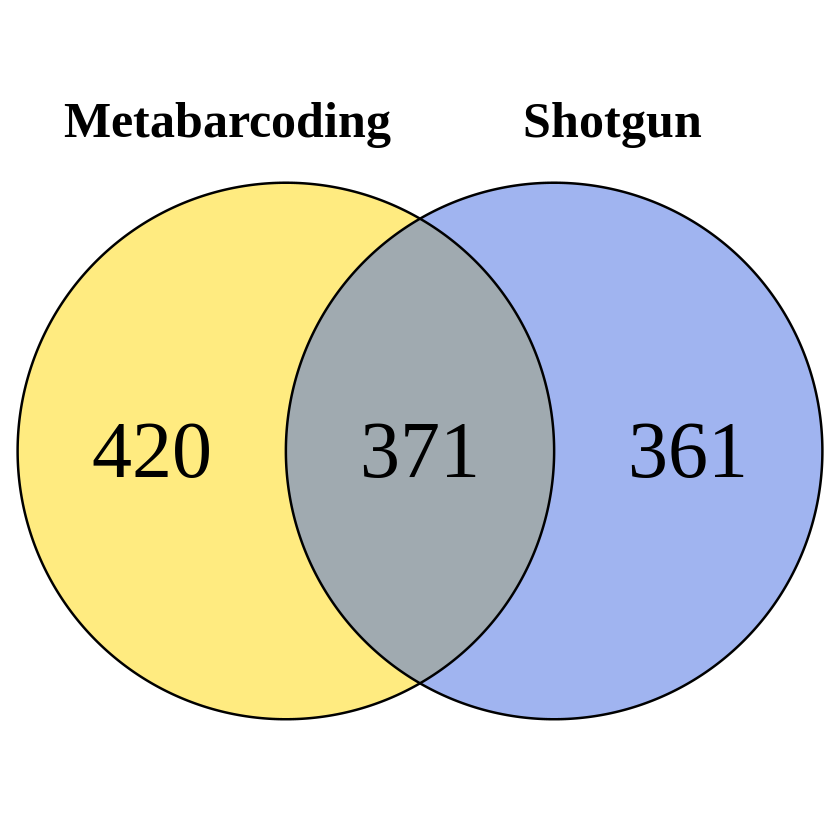

In [98]:
# Family
fam_metabar <- unique(metbar$family[!is.na(metbar$family)])
fam_shotgun <- unique(shotgun_eu$family[!is.na(shotgun_eu$family)])
taxa <- list(metabarcoding = fam_metabar, shotgun_eu = fam_shotgun)

# Venn Diagram (Saved manually)
display_venn(taxa,
             category.names = c("Metabarcoding", "Shotgun"),
             fill = c("gold", "royalblue"),
             cex = 4,
             cat.cex = 2.5, cat.fontface = "bold",
             cat.pos = c(-10,10),
             cat.dist = c(0.05, 0.05),
             scaled = F)

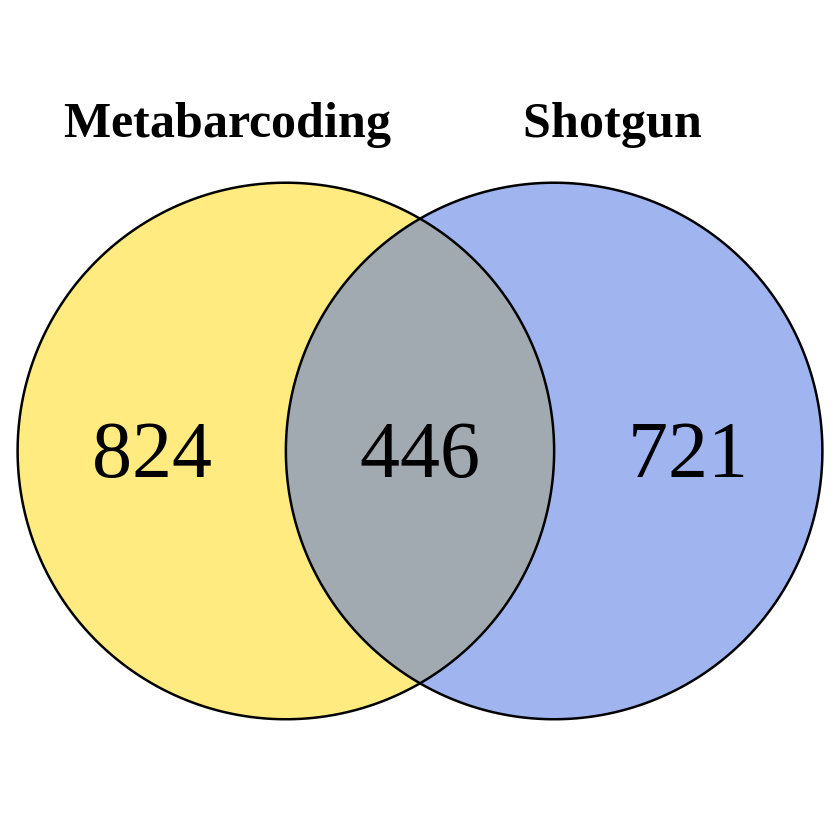

In [102]:
# Genus
gen_metabar <- unique(metbar$genus[!is.na(metbar$genus)])
gen_shotgun <- unique(shotgun_eu$genus[!is.na(shotgun_eu$genus)])
taxa <- list(metabarcoding = gen_metabar, shotgun_eu = gen_shotgun)

# Venn Diagram (Saved manually)
display_venn(taxa,
             category.names = c("Metabarcoding", "Shotgun"),
             fill = c("gold", "royalblue"),
             cex = 4,
             cat.cex = 2.5, cat.fontface = "bold",
             cat.pos = c(-10,10),
             cat.dist = c(0.05, 0.05),
             scaled = F)

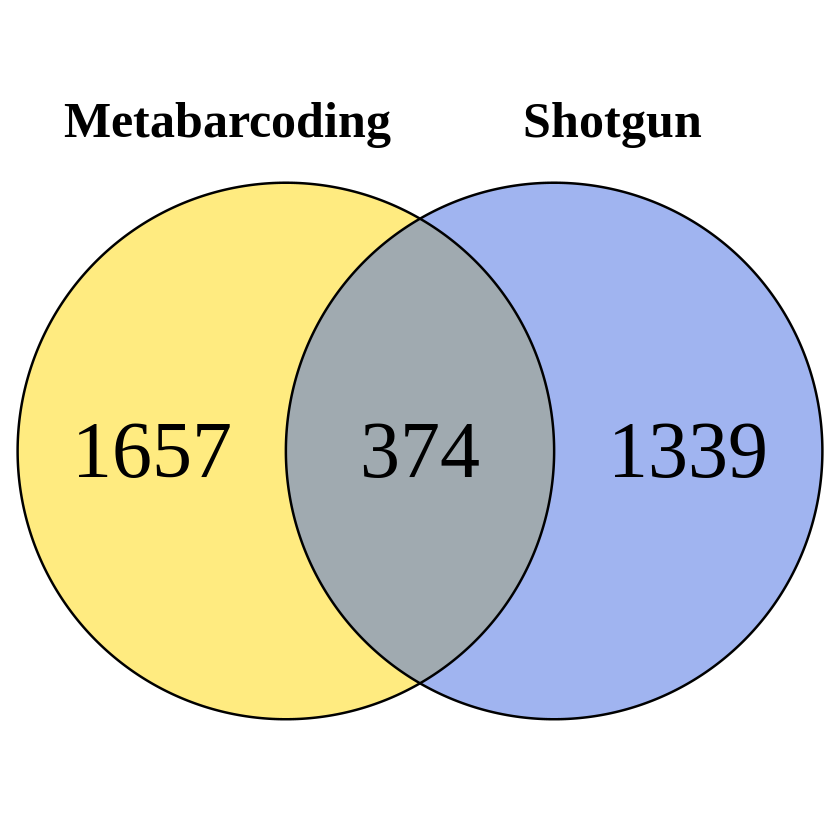

In [103]:
# Species
sps_metabar <- unique(metbar$species[!is.na(metbar$species)])
sps_shotgun <- unique(shotgun_eu$species[!is.na(shotgun_eu$species)])
taxa <- list(metabarcoding = sps_metabar, shotgun_eu = sps_shotgun)

# Venn Diagram (Saved manually)
display_venn(taxa,
             category.names = c("Metabarcoding", "Shotgun"),
             fill = c("gold", "royalblue"),
             cex = 4,
             cat.cex = 2.5, cat.fontface = "bold",
             cat.pos = c(-10,10),
             cat.dist = c(0.05, 0.05),
             scaled = F)

In [22]:
# Phylum
phyl_metabar <- unique(metbar$phylum[!is.na(metbar$phylum)])
phyl_shotgun <- unique(shotgun_eu$phylum[!is.na(shotgun_eu$phylum)])
taxa <- list(metabarcoding = phyl_metabar, shotgun_eu = phyl_shotgun)

# Unique phyla
unq_metabar <- sort(taxa$metbar[!taxa$metbar %in% taxa$shotgun_eu])
unq_shotgun <- sort(taxa$shotgun_eu[!taxa$shotgun_eu %in% taxa$metbar])

# Phylum table
df <- data.frame(phylum = unique(c(phyl_metabar, phyl_shotgun)))

df <- df %>% mutate(meta = ifelse(df$phylum %in% phyl_metabar, "metabar", NA)) %>%
  mutate(shot = ifelse(df$phylum %in% phyl_shotgun, "shotgun", NA)) %>% 
  mutate(metabarcoding = ifelse(meta == "metabar", phylum, NA)) %>% 
  mutate(shotgun = ifelse(shot == "shotgun", phylum, NA)) %>% 
  select(metabarcoding, shotgun) %>% 
  arrange(shotgun)

# Presence absence table
rownames(df) <- ifelse(!is.na(df$metabarcoding), df$metabarcoding, df$shotgun )
df$metabarcoding <- ifelse(!is.na(df$metabarcoding), 1, 0)
df$shotgun <- ifelse(!is.na(df$shotgun), 1, 0)

# Recover phylum
df$phylum <- rownames(df)

# Order columns
df <- df[,c(3,1,2)]

# Share
df <- df %>% mutate(belonging = ifelse(metabarcoding == 1 & shotgun == 1, "shared",
                                 ifelse(metabarcoding == 1 & shotgun == 0, "metabarcoding","shotgun")))

write.table(df, "phylum_comparison_table.eukaryota.tsv", quote = F, row.names = F, sep="\t")

Using phylum, belonging as id variables



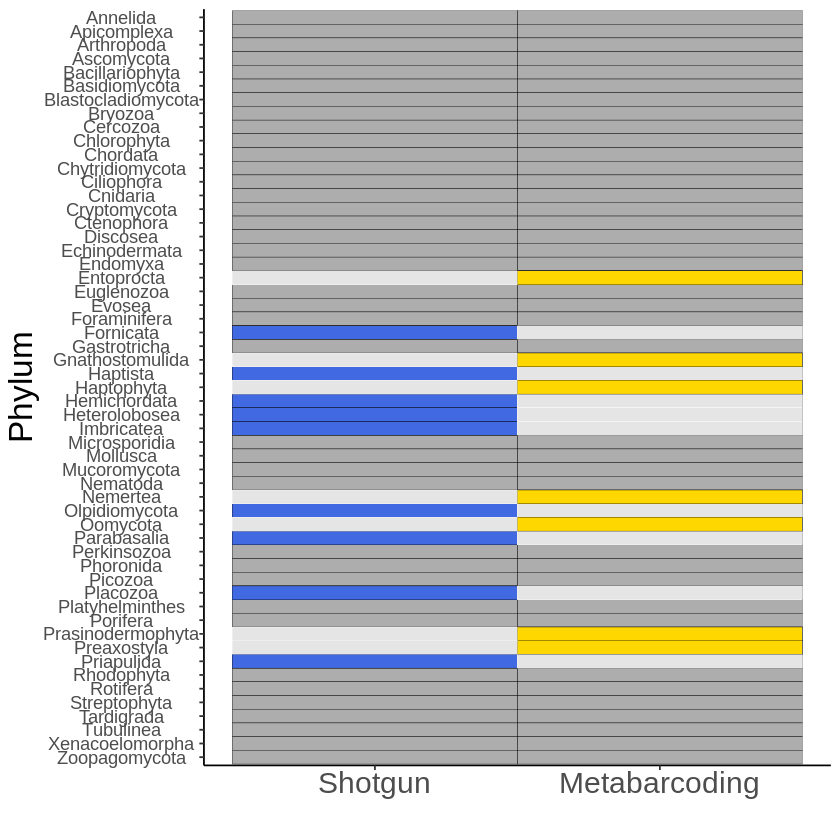

In [23]:
# Heatmap
dfm <- melt(df)
dfm$variable <- ifelse(dfm$variable == "shotgun", "Shotgun", "Metabarcoding")
dfm$variable <- factor(dfm$variable, levels = c("Shotgun","Metabarcoding"))
dfm$value <- ifelse(dfm$value == 0, "Absence", "Presence")
dfm$phylum <- factor(dfm$phylum, levels = rev(sort(unique(dfm$phylum))))
p <- dfm %>% ggplot() + geom_tile(aes(x=variable, y=phylum), fill="gray60", color="black", alpha=0.8) +
# Shotgun
geom_tile(data=subset(dfm, belonging == "shotgun" & variable == "Shotgun"),
          aes(x=variable, y=phylum), fill="royalblue", color="black") +
geom_tile(data=subset(dfm, belonging == "shotgun" & variable == "Metabarcoding"),
          aes(x=variable, y=phylum), fill="gray90", color="white") +
# Metabarcoding
geom_tile(data=subset(dfm, belonging == "metabarcoding" & variable == "Metabarcoding"),
          aes(x=variable, y=phylum), fill="gold", color="black") +
geom_tile(data=subset(dfm, belonging == "metabarcoding" & variable == "Shotgun"),
          aes(x=variable, y=phylum), fill="gray90", color="white") +
labs(x = "", y = "Phylum", fill="") +
theme_classic() %+replace% theme(axis.text.x = element_text(size=18),
                                 axis.text.y = element_text(size=11),
                                 axis.title = element_text(size=20),
                                 legend.title = element_text(size=18, face="bold"),
                                 legend.text = element_text(size=16))

png(file="comp.Presence_Absence.phylum.png", width=2300, height=2500, res=300)
p
dev.off()

In [104]:
# Family
fam_metabar <- unique(metbar$family[!is.na(metbar$family)])
fam_shotgun <- unique(shotgun_eu$family[!is.na(shotgun_eu$family)])
taxa <- list(metabarcoding = fam_metabar, shotgun_eu = fam_shotgun)

# Unique family
unq_metabar <- sort(taxa$metbar[!taxa$metbar %in% taxa$shotgun_eu])
unq_shotgun <- sort(taxa$shotgun_eu[!taxa$shotgun_eu %in% taxa$metbar])

# Phylum table
df <- data.frame(family = unique(c(fam_metabar, fam_shotgun)))

df <- df %>% mutate(meta = ifelse(df$family %in% fam_metabar, "metabar", NA)) %>%
  mutate(shot = ifelse(df$family %in% fam_shotgun, "shotgun", NA)) %>% 
  mutate(metabarcoding = ifelse(meta == "metabar", family, NA)) %>% 
  mutate(shotgun = ifelse(shot == "shotgun", family, NA)) %>% 
  select(metabarcoding, shotgun) %>% 
  arrange(shotgun)

# Presence absence table
rownames(df) <- ifelse(!is.na(df$metabarcoding), df$metabarcoding, df$shotgun )
df$metabarcoding <- ifelse(!is.na(df$metabarcoding), 1, 0)
df$shotgun <- ifelse(!is.na(df$shotgun), 1, 0)

# Recover phylum
df$family <- rownames(df)

# Order columns
df <- df[,c(3,1,2)]

# Share
df <- df %>% mutate(belonging = ifelse(metabarcoding == 1 & shotgun == 1, "shared",
                                 ifelse(metabarcoding == 1 & shotgun == 0, "metabarcoding","shotgun")))

write.table(df, "family_comparison_table.eukaryota.tsv", quote = F, row.names = F, sep="\t")

In [105]:
table(df$belonging)


metabarcoding        shared       shotgun 
          420           371           361 

------------------

**CLR**

In [80]:
# Collapse data
metbar_select <- metbar[,c('qseqid','phylum')]
reads <- final.rarefy$reads[, colnames(final.rarefy$reads) %in% metbar_select[,'qseqid']]
mreads <- melt(merge(t(reads), metbar_select, by.x="row.names", by.y="qseqid"))
mreads <- mreads %>% group_by(phylum, variable) %>% summarize(value = sum(value))

Using Row.names, phylum as id variables

`summarise()` has grouped output by 'phylum'. You can override using the `.groups` argument.


In [85]:
# Labels
labels <- unique(metbar[,c('kingdom','phylum')])
labels$kingdom[is.na(labels$kingdom)] <- "Undefined"
labels <- labels %>% drop_na(phylum)

In [81]:
# CLR
mreads <- dcast(mreads, phylum ~ variable)
mreads <- mreads %>% drop_na(phylum)
rownames(mreads) <- mreads[,'phylum']
mreads <- mreads[,-1]
mreads <- mreads[labels$phylum,]
table <- clr(mreads)

png 
  2

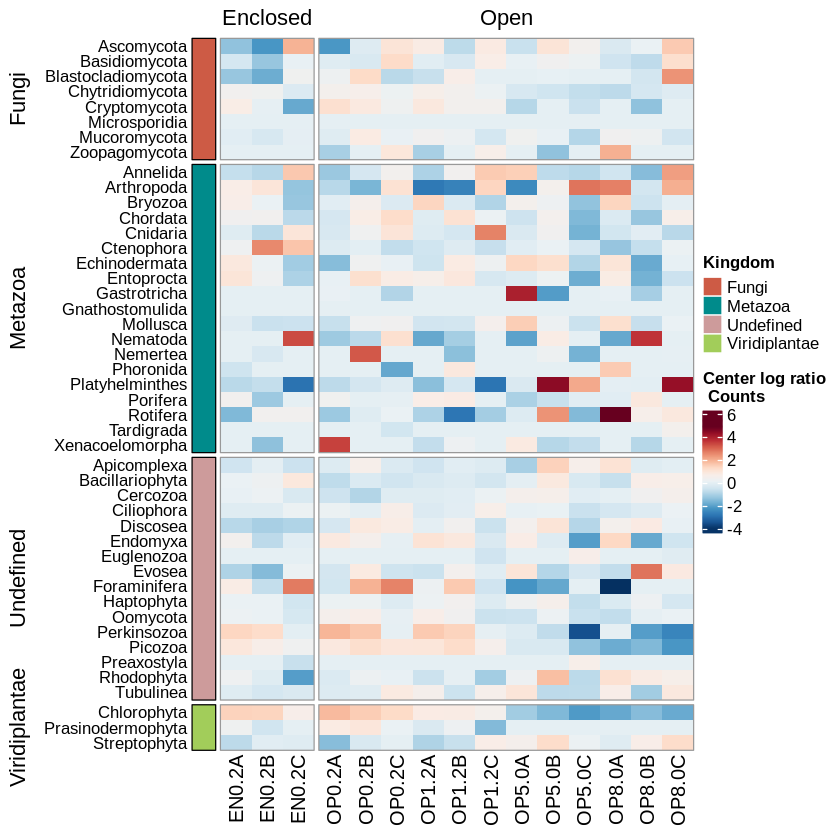

In [86]:
# Heatmap
colors = rev(colorRampPalette(brewer.pal(11,"RdBu"))(16))
annot <- rowAnnotation(Kingdom = labels$kingdom, show_annotation_name = F,
                       col = list(Kingdom = c("Fungi"="coral3", "Metazoa"="darkcyan", "Viridiplantae"="darkolivegreen3", "Undefined"="rosybrown3")), border = T)
p <- Heatmap(as.matrix(table), name = "Center log ratio \n Counts", cluster_rows = F, cluster_columns = F,
             row_order = labels$phylum, col = colors, left_annotation = annot, row_split = labels$kingdom,
             row_names_side = "left", row_names_gp = gpar(fontsize = 10), border = "gray60",
             column_split = c(rep("Enclosed",3), rep("Open",12)), raster_quality=3)
draw(p)

png(file="GenomeDK_Metabar/Heatmap_metabar.EU.CLR.png", width=2300, height=2000, res=300)
draw(p)
dev.off()

*CLR Heatmap: Euk Family*

In [50]:
# Collapse data
metbar_select <- metbar[,c('qseqid','family')]
reads <- final.rarefy$reads[, colnames(final.rarefy$reads) %in% metbar_select[,'qseqid']]
mreads <- melt(merge(t(reads), metbar_select, by.x="row.names", by.y="qseqid"))
mreads <- mreads %>% group_by(family, variable) %>% summarize(value = sum(value))

Using Row.names, family as id variables

`summarise()` has grouped output by 'family'. You can override using the `.groups`
argument.


In [51]:
# Labels
labels <- unique(metbar[,c('kingdom','family')])
labels$kingdom[is.na(labels$kingdom)] <- "Undefined"
labels <- labels %>% drop_na(family)

In [52]:
# CLR
mreads <- dcast(mreads, family ~ variable)
mreads <- mreads %>% drop_na(family)
rownames(mreads) <- mreads[,'family']
mreads <- mreads[,-1]
mreads <- mreads[labels$family,]
table <- clr(mreads)

In [56]:
# Save CLR
z <- labels[labels$family %in% rownames(table),]
z <- cbind(z, table)
rownames(z) <- rownames(table)
write.table(z, "GenomeDK_Metabar/CLR.EU.metabar.tsv", quote=F, sep="\t", row.names = F)

png 
  2

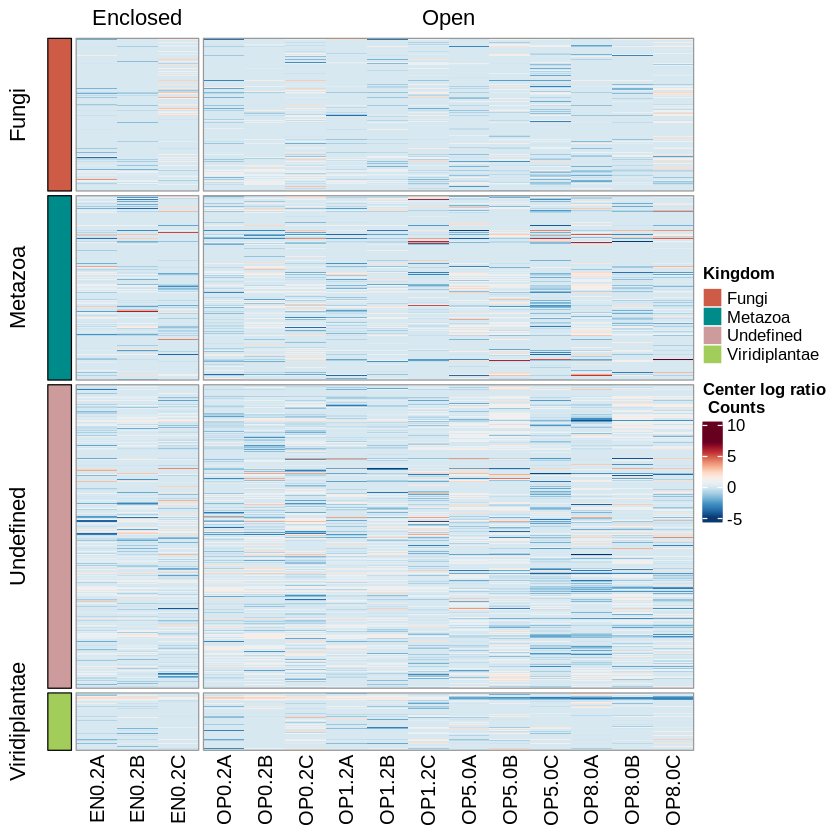

In [54]:
colors = rev(colorRampPalette(brewer.pal(11,"RdBu"))(16))
annot <- rowAnnotation(Kingdom = labels$kingdom, show_annotation_name = F,
                       col = list(Kingdom = c("Fungi"="coral3", "Metazoa"="darkcyan", "Viridiplantae"="darkolivegreen3", "Undefined"="rosybrown3")), border = T)
p <- Heatmap(as.matrix(table), name = "Center log ratio \n Counts", cluster_rows = F, cluster_columns = F,
             row_order = labels$family, col = colors, left_annotation = annot, row_split = labels$kingdom,
             row_names_side = "left", row_names_gp = gpar(fontsize = 0), border = "gray60",
             column_split = c(rep("Enclosed",3), rep("Open",12)), raster_quality=3)
draw(p)

png(file="GenomeDK_Metabar/Heatmap_metabar.EU.CLR.FAMILY.png", width=2300, height=2000, res=300)
draw(p)
dev.off()

*CLR Heatmap: Euk Family - Shotgun*

In [52]:
mreads <- melt(shotgun_eu[,c(6,9:23)] %>% drop_na(family))
mreads <- mreads %>% group_by(family, variable) %>% summarize(value = sum(value))

Using family as id variables

`summarise()` has grouped output by 'family'. You can override using the `.groups`
argument.


In [53]:
# Labels
labels <- unique(shotgun_eu[,c('kingdom','family')])
labels$kingdom[is.na(labels$kingdom)] <- "Undefined"
labels <- labels %>% drop_na(family)

In [54]:
# CLR
mreads <- dcast(mreads, family ~ variable)
mreads <- mreads %>% drop_na(family)
rownames(mreads) <- mreads[,'family']
mreads <- mreads[,-1]
mreads <- mreads[labels$family,]
table <- clr(mreads)

In [59]:
# Organize table
table <- table[,c(13:15,1:12)]

In [61]:
# Save CLR
z <- labels[labels$family %in% rownames(table),]
z <- cbind(z, table)
rownames(z) <- rownames(table)
write.table(z, "GenomeDK_LCA/CLR.EU.shotgun.tsv", quote=F, sep="\t", row.names = F)

png 
  2

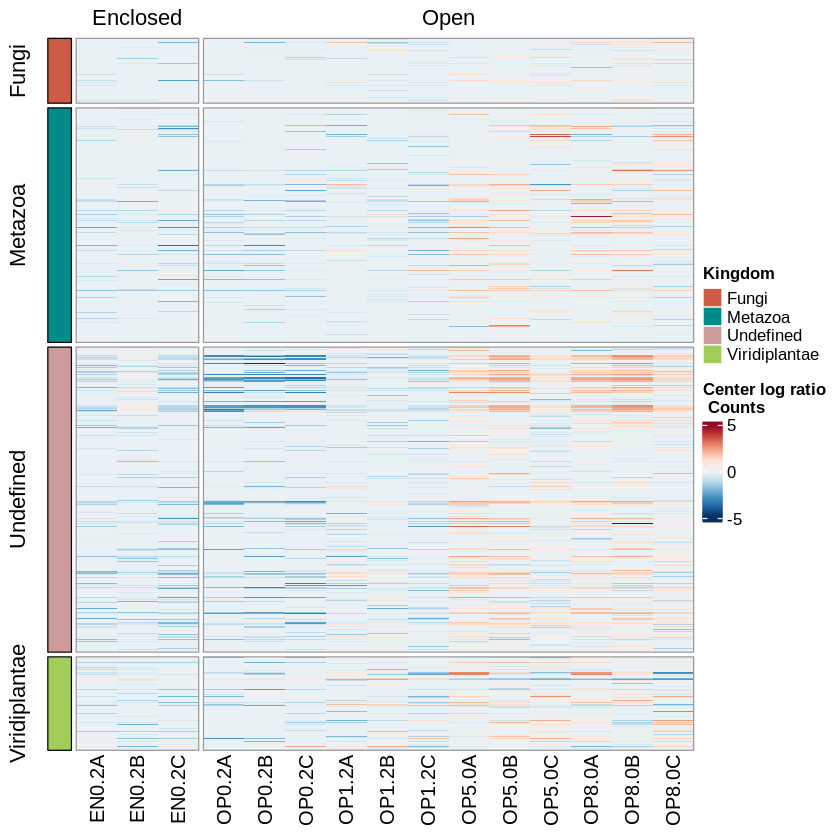

In [62]:
colors = rev(colorRampPalette(brewer.pal(11,"RdBu"))(16))
annot <- rowAnnotation(Kingdom = labels$kingdom, show_annotation_name = F,
                       col = list(Kingdom = c("Fungi"="coral3", "Metazoa"="darkcyan", "Viridiplantae"="darkolivegreen3", "Undefined"="rosybrown3")), border = T)
p <- Heatmap(as.matrix(table), name = "Center log ratio \n Counts", cluster_rows = F, cluster_columns = F,
             row_order = labels$family, col = colors, left_annotation = annot, row_split = labels$kingdom,
             row_names_side = "left", row_names_gp = gpar(fontsize = 0), border = "gray60",
             column_split = c(rep("Enclosed",3), rep("Open",12)), raster_quality=3)
draw(p)

png(file="GenomeDK_LCA/07-Plots/Heatmap_shotgun.EU.CLR.FAMILY.png", width=2300, height=2000, res=300)
draw(p)
dev.off()